### Regression with a Flood Prediction Dataset (Playground Series - Season 4, Episode 5)

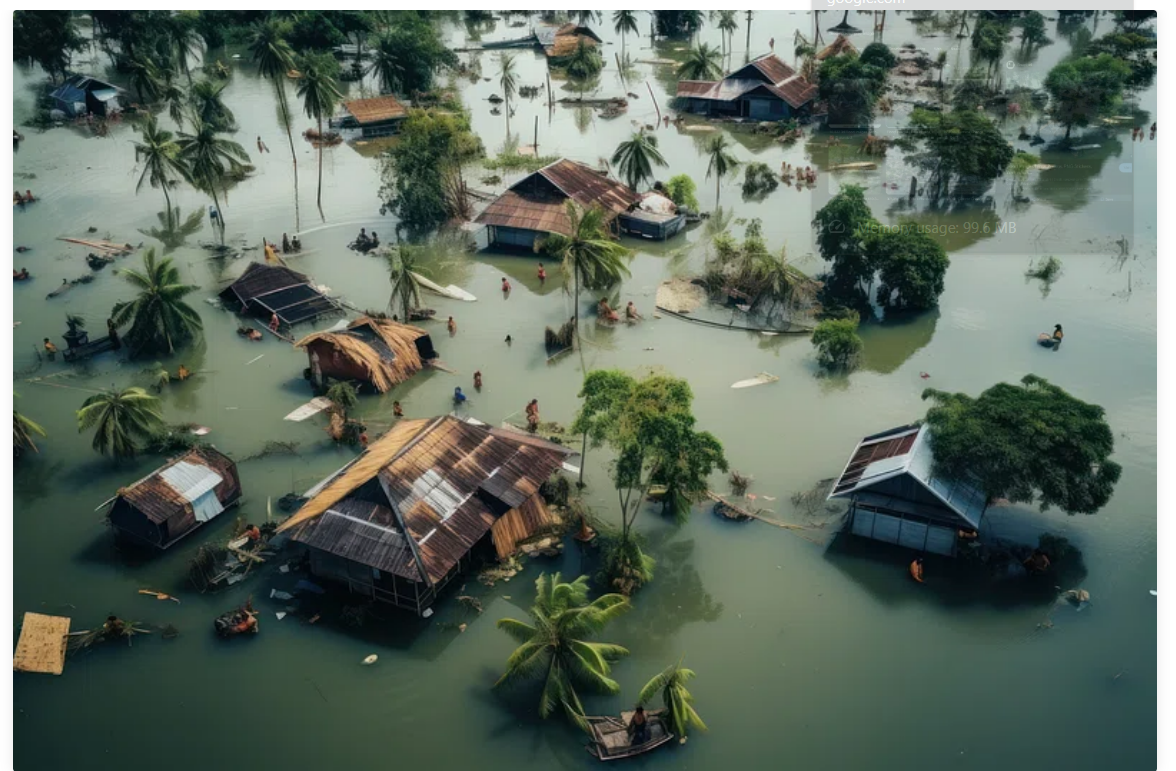

## **Descriptions**
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Flood Prediction Factors dataset. Feature distributions are close to, but not exactly the same, as the original.

Files
train.csv - the training dataset; FloodProbability is the target<br>
test.csv - the test dataset; your objective is to predict the FloodProbability for each row<br>
sample_submission.csv - a sample submission file in the correct format

## **Objectives**
The goal of this competition is to predict the probability of a region flooding based on various factors.

## About Author
 #### Name: Shuvendu Pritam Das<br>
 #### Email Id: shuvendupritamdas181@gmail.com <br>
 #### LinkedIn Id: https://www.linkedin.com/in/shuvendupritamdas/


## 1. **Importing Libraries and Data sets**

### **1.1 Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### **1.2 Data Sets**

In [2]:
df_train = pd.read_csv(r"C:\Users\shuve\Desktop\ML((GFG)\Kaggle Comp\Fload\train.csv")
df_test = pd.read_csv(r"C:\Users\shuve\Desktop\ML((GFG)\Kaggle Comp\Fload\test.csv")

In [3]:
df_train.head(3)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530


In [4]:
df_test.head(3)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3


In [5]:
df_train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [6]:
df_test.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

### **1.3 Defining Features and Targets**<br>
#### **Features**:
1. 'id'<br> 
2. 'MonsoonIntensity'<br> 
3. 'TopographyDrainage'<br> 
4. 'RiverManagement'<br> 
5. 'Deforestation'<br> 
6. 'Urbanization'<br> 
7. 'ClimateChange'<br> 
8. 'DamsQuality'<br> 
9. 'Siltation'<br> 
10. 'AgriculturalPractices'<br> 
11. 'Encroachments'<br> 
12. 'IneffectiveDisasterPreparedness'<br> 
13. 'DrainageSystems'<br> 
14. 'CoastalVulnerability'<br> 
15. 'Landslides'<br> 
16. 'Watersheds'<br> 
17. 'DeterioratingInfrastructure'<br> 
18. 'PopulationScore'<br> 
19. 'WetlandLoss'<br> 
20. 'InadequatePlanning'<br> 
21. 'PoliticalFactors'<br>
#### **Target**:
1. 'FloodProbability'


 ##  **2.Data Exploration**

### **2.1 Dimensions**

In [7]:
df_train.shape,df_test.shape

((1117957, 22), (745305, 21))

### **2.2 Statistical Summary**

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

###  **2.3 Dropping Id Column**

In [9]:
df_train.drop(columns= ["id"], inplace=True)
df_train.head(2)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450


### **2.4 Check for Duplicacy**

In [10]:
df_train.duplicated().sum()

0

Remark: No duplicacy found

### **2.5 Check for Null values**

In [11]:
df_train.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

Remark: No Null value Found

### **2.6 Descriptive Analytics**

In [12]:
df_train.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


## **3. EDA**
### **3.1 Univariate Analysis**<br>
#### **3.1.1 Distributions**

In [13]:
# for i in df_train.columns:
#     plt.figure(figsize = (3,3))
#     print(sns.histplot(df_train[i],kde = True))
#     plt.show()

#### **3.1.2 Box-Plot**

In [14]:
# for i in df_train.columns:
#     plt.figure(figsize = (3,3))
#     print(sns.boxplot(df_train[i]), end = " ")
#     plt.title(i)
#     plt.show()

### **3.2 Multivariate Analysis**


#### **3.2.2 Correlation Matrix**

In [15]:
df_train.corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366
Encroachments,-0.010309,-0.012887,-0.011615,-0.013175,-0.010784,-0.012533,-0.010890,-0.010628,-0.012244,1.000000,...,-0.011994,-0.016203,-0.011299,-0.013542,-0.010404,-0.010645,-0.010364,-0.012175,-0.011860,0.178841


Remark: As correlation coefficients are tends to  `0`, no `dependent feature` exists

#### **3.2.3 Correlation Heatmap**

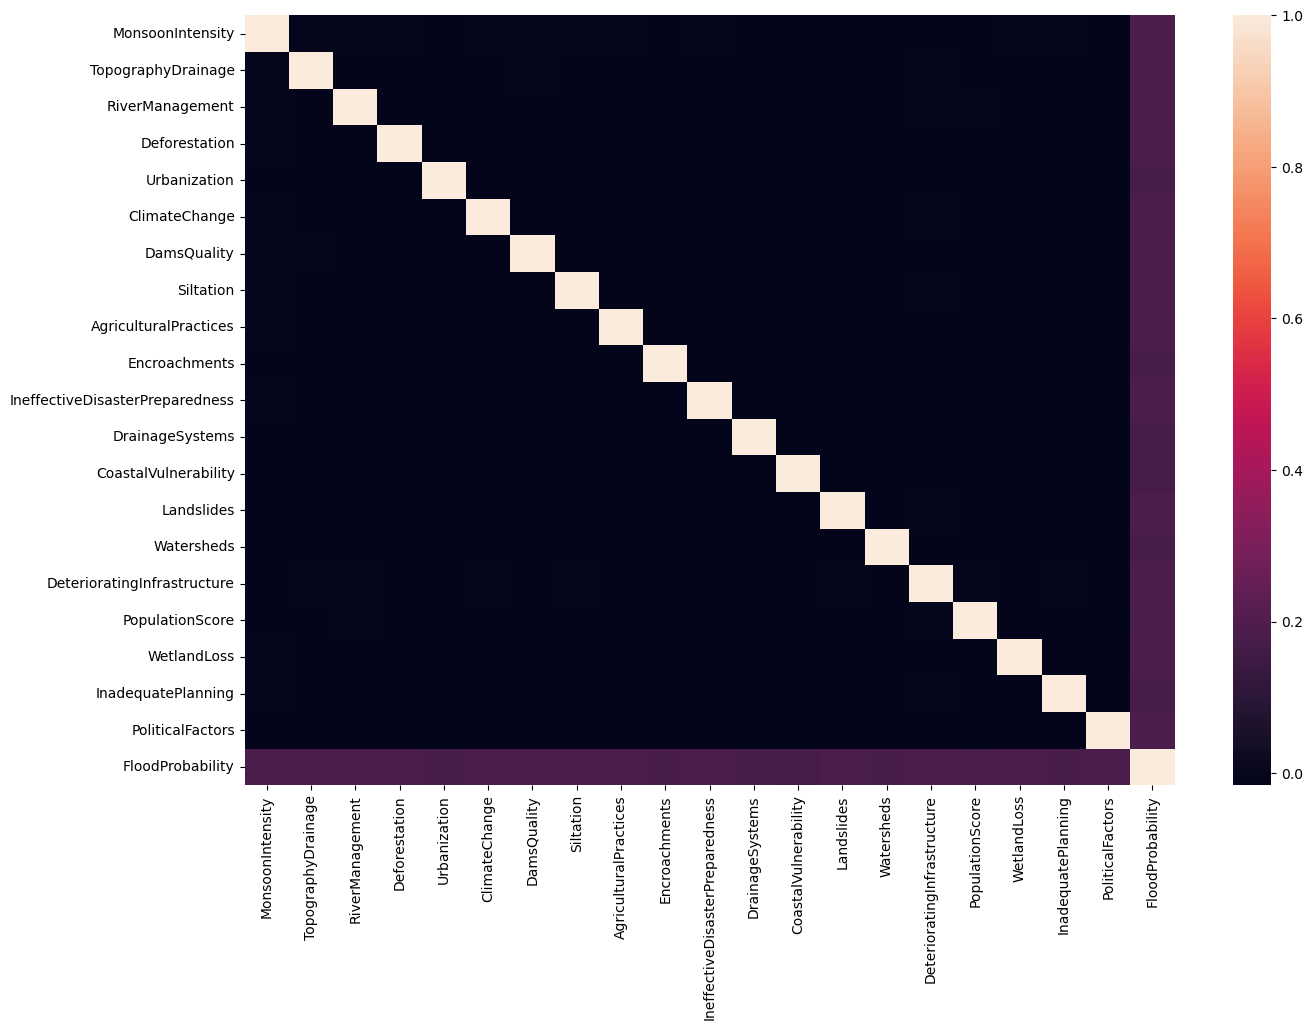

In [16]:
plt.figure(figsize =(15,10))
sns.heatmap(df_train.corr())
plt.show()


## **4. Feature Engineering**<br> 
### **4.1 Feature Transformation**
#### **4.1.2 Scaling**
#### **4.1.2.1 Standardization**

In [17]:
x_train = df_train.iloc[:,:20]
y_train = df_train.iloc[:,-1]
x_test = df_test.iloc[:,1:]

In [18]:
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

In [19]:
x_train.head(2)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0.038198,1.467768,0.021561,1.490362,0.507578,-0.453941,-0.458881,-0.933107,-0.939124,-0.455632,-1.417247,0.025627,-0.935421,-0.929311,0.034080,-0.448422,0.999182,0.023754,0.989568,-0.927598
1,0.524488,0.990186,-0.461021,-0.459251,1.467551,1.489938,-0.938943,0.034951,-0.455692,0.504372,1.951149,0.990722,-1.414142,-2.372808,-0.926353,0.035884,-0.929294,-0.943038,-0.451961,-0.927598



## **5. Model Building**
### **5.1 Splitting `Training data` into `Model Training` and `Hold data` ( For Model Training)**

In [20]:
from sklearn.model_selection import train_test_split
x_trn,x_tst,y_trn,y_tst=train_test_split(x_train,y_train,test_size=0.25)

#### **5.1.1 Shape of Training and Test Data for Models** 

In [21]:
x_trn.shape,x_tst.shape,y_trn.shape,y_tst.shape

((838467, 20), (279490, 20), (838467,), (279490,))

### **5.2 Model Building**
#### **5.2.1 Importing Libraries** 

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [32]:
base_model_mlp = MLPRegressor()

In [33]:
base_model_mlp.fit(x_trn, y_trn)
y_prd_4 = base_model_mlp.predict(x_tst)
mse_trn_4 = mean_squared_error(y_tst, y_prd_4)
r2_score_trn_4 = r2_score(y_tst, y_prd_4)
print("mlp MSE:", mse_trn_4)
print("mlp r2_score:", r2_score_trn_4)

mlp MSE: 0.00038858398432311506
mlp r2_score: 0.8508507989231626



## **6. Model Prediction**
### **6.1 Model Prediction on `Test data` (Model Testing Data)**

In [34]:
y_test = base_model_mlp.predict(x_test)

In [35]:
y_test

array([0.57281304, 0.45143736, 0.45064698, ..., 0.61892778, 0.55137097,
       0.51208905])

## **7. Submission**
### **7.1  Addition of `Id` in final submission**

In [36]:
df_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [37]:
submission_df = pd.DataFrame({
    'id': df_test['id'],
    'FoodPrediction': y_test
})

In [38]:
submission_df.head()

,id,FoodPrediction
0,1117957,0.572813
1,1117958,0.451437
2,1117959,0.450647
3,1117960,0.464013
4,1117961,0.464050


In [ ]:
submission_df.to_csv('submission_mlp.csv', index=False)
print("Submission file created successfully.")